## News Data Classification

### The Reuters dataset

### Loading the Reuters dataset

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(len(train_data))
print(len(test_data))


8982
2246


## Print the train data

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## Decoding the newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [6]:
train_labels[10]

3

## Preparing the data

## Encoding the input data

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [19]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Building the model

## Model definition

In [32]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

## Compile the model

In [33]:
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Validation

## Make a validation set

In [34]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [35]:
print(f"partial_x_train shape: {partial_x_train.shape}")
print(f"partial_y_train shape: {partial_y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

partial_x_train shape: (7982, 10000)
partial_y_train shape: (7982, 46)
x_val shape: (1000, 10000)
y_val shape: (1000, 46)


## Training the model

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 106ms/step - accuracy: 0.3068 - loss: 3.5850 - val_accuracy: 0.5920 - val_loss: 2.5266
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6222 - loss: 2.1776 - val_accuracy: 0.6650 - val_loss: 1.6119
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7237 - loss: 1.4149 - val_accuracy: 0.7370 - val_loss: 1.2434
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7869 - loss: 1.0297 - val_accuracy: 0.7710 - val_loss: 1.1125
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8302 - loss: 0.7946 - val_accuracy: 0.7890 - val_loss: 1.0275
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8715 - loss: 0.6139 - val_accuracy: 0.7970 - val_loss: 0.9621
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9018 - loss: 0.4855 - val_accuracy: 0.8060 - val_loss: 0.9311
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9215 - loss: 0.3781 - val_accuracy: 0.8200 -

## Plot the training and validation loss

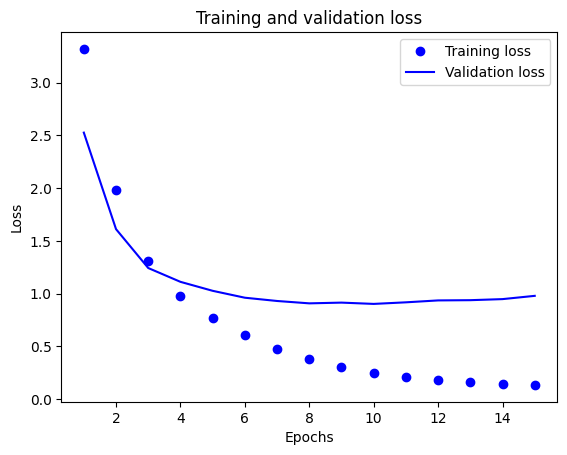

In [37]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Plot the training and validation accuracy

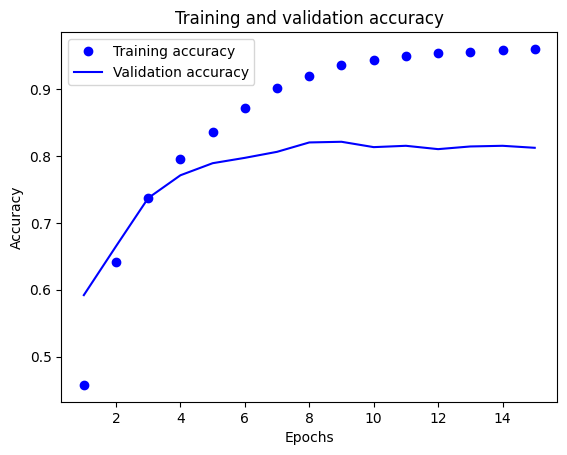

In [38]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()